In [1]:
%reload_ext autoreload
%autoreload 2

from utils.data_utils import *
from utils.models_utils import *

In [2]:
data = merge_data()

Wczytano plik: test_data_1.csv
Wczytano dane z 1


In [3]:
display_count_of_labels(data)

Emocje:
label
natural      3292
happy        1109
disturbed     706
sad           434
surprised     219
Name: count, dtype: int64


In [4]:
sum(data['label'].value_counts())

5760

In [5]:
labels = data['label']

data_for_prediction = drop_label_column(data)

In [6]:
label_encoder = load_label_encoder()
scaler = load_scaler()

RF = load_model("RF")
SVC = load_model("SVC")
KNN = load_model("KNN")
NN = load_model("NN")

In [7]:
labels_encoded = label_encoder.fit_transform(labels)
scaled_data = scaler.fit_transform(data_for_prediction)

In [8]:
RF_predict = RF.predict(data_for_prediction)
SVC_predict = SVC.predict(data_for_prediction)
KNN_predict = KNN.predict(scaled_data)
NN_predict = NN.predict(scaled_data)

C:\Users\Seba\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Nie można odnaleźć określonego pliku
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Seba\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Seba\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Seba\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Seba\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(execu


Dokładność modelu Random Forest: 0.9997

>>> Raport klasyfikacji:

              precision    recall  f1-score   support

   disturbed       1.00      1.00      1.00       706
       happy       1.00      1.00      1.00      1109
     natural       1.00      1.00      1.00      3292
         sad       1.00      1.00      1.00       434
   surprised       1.00      1.00      1.00       219

    accuracy                           1.00      5760
   macro avg       1.00      1.00      1.00      5760
weighted avg       1.00      1.00      1.00      5760



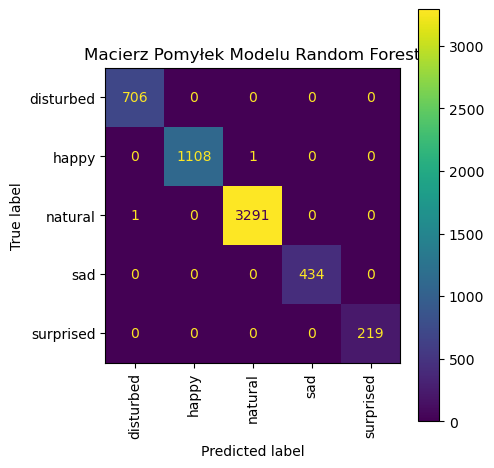

In [9]:
show_accuracy(labels_encoded, RF_predict, label_encoder, "Random Forest")


Dokładność modelu Support Vector: 0.9799

>>> Raport klasyfikacji:

              precision    recall  f1-score   support

   disturbed       0.94      0.96      0.95       706
       happy       0.99      0.97      0.98      1109
     natural       0.98      0.98      0.98      3292
         sad       0.99      1.00      1.00       434
   surprised       0.99      1.00      1.00       219

    accuracy                           0.98      5760
   macro avg       0.98      0.98      0.98      5760
weighted avg       0.98      0.98      0.98      5760



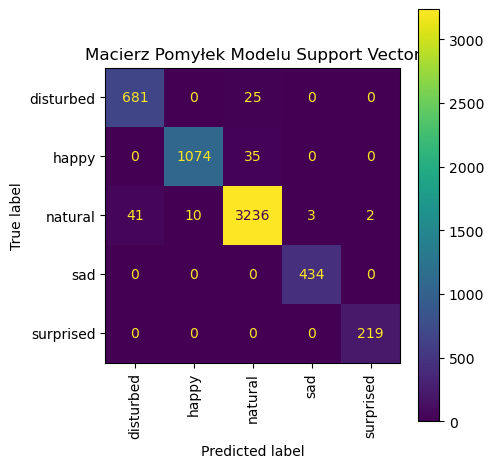

In [10]:
show_accuracy(labels_encoded, SVC_predict, label_encoder, "Support Vector")


Dokładność modelu K Nearest Neighbors: 0.9738

>>> Raport klasyfikacji:

              precision    recall  f1-score   support

   disturbed       0.94      0.95      0.95       706
       happy       0.98      0.99      0.98      1109
     natural       0.99      0.97      0.98      3292
         sad       0.93      1.00      0.96       434
   surprised       0.95      0.97      0.96       219

    accuracy                           0.97      5760
   macro avg       0.96      0.98      0.97      5760
weighted avg       0.97      0.97      0.97      5760



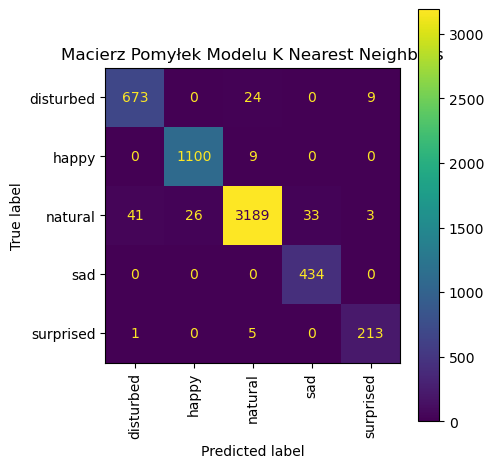

In [11]:
show_accuracy(labels_encoded, KNN_predict, label_encoder, "K Nearest Neighbors")


Dokładność modelu Neural Network: 0.9797

>>> Raport klasyfikacji:

              precision    recall  f1-score   support

   disturbed       0.93      1.00      0.96       706
       happy       0.98      1.00      0.99      1109
     natural       1.00      0.96      0.98      3292
         sad       0.93      1.00      0.97       434
   surprised       0.98      1.00      0.99       219

    accuracy                           0.98      5760
   macro avg       0.96      0.99      0.98      5760
weighted avg       0.98      0.98      0.98      5760



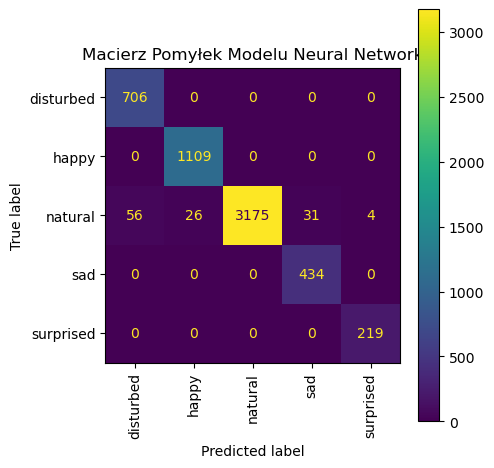

In [12]:
show_accuracy(labels_encoded, NN_predict, label_encoder, "Neural Network")